### Set up

In [103]:
#Import modules

import pandas as pd
pd.options.display.max_columns = 99
pd.options.display.max_rows = 999
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# from numpy import arange, log10

import matplotlib.pyplot as plt
%matplotlib inline

from numpy import arange, log10

## Load mu coeffs and use

In [2]:
CN_full = pd.read_csv('./../data/CN_full.csv', encoding = 'utf-8')
df = pd.read_csv('./../data/processed/mu_FE_decomposition.csv')


In [5]:
#Large countries
large_countries = df.groupby('PYOD')['VART'].sum().sort_values().tail(10).index

In [6]:
# Main products
df.groupby(['CN ID 4'])['VART'].sum().sort_values().tail(30).index

Int64Index([8536, 8431, 6110, 8481, 8414, 6204, 8544, 4011, 4202, 8443, 8413,
            9403, 9401, 9021, 7403, 8802, 8409, 8542, 6403, 8517, 3004, 8704,
            8411, 8471, 8803, 8708, 2710, 8703, 2711, 2709],
           dtype='int64', name=u'CN ID 4')

In [7]:
main_prods = [8409, 6403, 8517, 3004, 8411, 8704, 8471, 8803, 8802, 8708, 2710, 8703, 2711, 2709]
CN_full[['CN ID 4', 'CN label 4']].drop_duplicates().loc[CN_full['CN ID 4'].isin(main_prods)]

,CN ID 4,CN label 4
4067,2709,Petroleum oils and oils obtained from bitumino...
4070,2710,Petroleum oils and oils obtained from bitumino...
4142,2711,Petroleum gases and other gaseous hydrocarbons
5253,3004,"Medicaments (excluding goods of heading 3002, ..."
9013,6403,"Footwear with outer soles of rubber, plastics,..."
11267,8409,Parts suitable for use solely or principally w...
11278,8411,"Turbojets, turbopropellers and other gas turbines"
12213,8471,Automatic data-processing machines and units t...
12728,8517,"Telephone sets, including telephones for cellu..."
13339,8703,Motor cars and other motor vehicles principall...


### France maps

In [114]:
#firm sizes
firm_size = df.groupby(['ID', 'YEAR'])[['VART']].sum().reset_index()
firm_size['log_M_size'] = log10(firm_size['VART'])
firm_size = firm_size.groupby(['ID'])[['log_M_size']].mean().reset_index()

#merge with mu FC coeffs
mu_coeffs = df[['ID', 'PYOD', 'mu_fc']].drop_duplicates().merge(firm_size)
mu_coeffs['log_size_bin'] = pd.cut(mu_coeffs['log_M_size'], arange(3, 12))

#load SIREN data
SIREN = pd.read_csv('./../data/SIREN.csv', ';', encoding = 'latin-1')
SIREN = SIREN[['SIREN', 'CODPOS', 'RPET', 'LIBREG','DEPET', 'COMET', 'LIBCOM', 'L6_NORMALISEE', 'L4_NORMALISEE', 'L1_NORMALISEE', 'DDEBACT']]#.sample(5)

In [119]:
merged = mu_coeffs.merge(SIREN, left_on = 'ID', right_on = 'SIREN', how = 'left').dropna()

# bad merging levels... 
# merged.groupby(['log_size_bin', '_merge']).count()

In [219]:
# geo info from
# https://www.data.gouv.fr/fr/datasets/contours-des-departements-francais-issus-d-openstreetmap/

import geopandas as gpd

gdf = gpd.read_file('./../data/Geographic/departements-20140306-50m.shp').iloc[:-5]

In [220]:
values = merged.groupby(['PYOD', 'log_size_bin', 'DEPET']).agg({'mu_fc': ['mean', 'std', 'count']})['mu_fc']
values = values.loc[['GB', 'BE', 'NL', 'DE', 'CH', 'IT', 'ES', 'CN', 'US']].reset_index()

In [237]:
# from numpy import mean
EU = gpd.read_file('./../data/Geographic/Europe.shp').set_index('NAME')

In [238]:
EU

,ORGN_NAME,geometry
NAME,,
Albania,Shqipëria,(POLYGON ((19.50115199999999 40.96229600000001...
Andorra,Andorra,"POLYGON ((1.439921999999996 42.60649100000001,..."
Austria,Österreich,"POLYGON ((16 48.77775199999999, 16 48.78252000..."
Belgium,België / Belgique,"POLYGON ((5 49.79374300000001, 4.9972390000000..."
Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((19.22947300000001 43.534584, 19.2292..."
Croatia,Hrvatska,"(POLYGON ((14.300375 44.501564, 14.289716 44.5..."
Czech Republic,Cesko,"POLYGON ((14.825232 50.87399300000001, 14.8368..."
Denmark,Danmark,(POLYGON ((11.99977999999999 54.94117700000001...
Estonia,Eesti,(POLYGON ((23.97510700000001 58.09690900000001...


In [246]:
EU.loc[[name]]

,ORGN_NAME,geometry
NAME,,
Belgium,België / Belgique,"POLYGON ((5 49.79374300000001, 4.9972390000000..."


BE


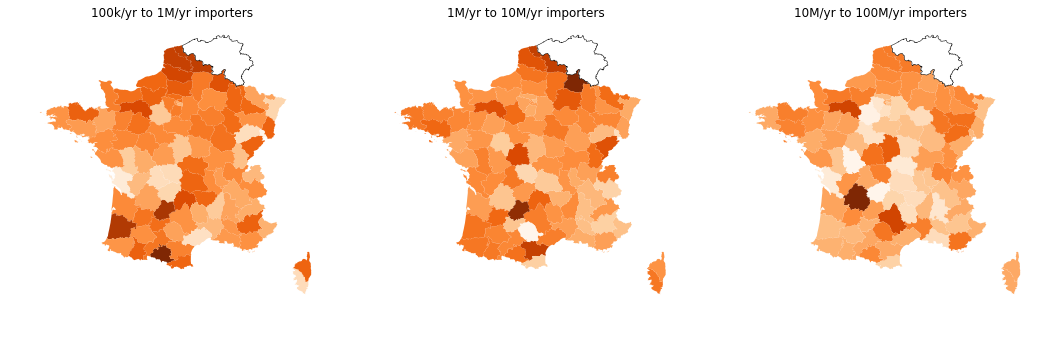

DE


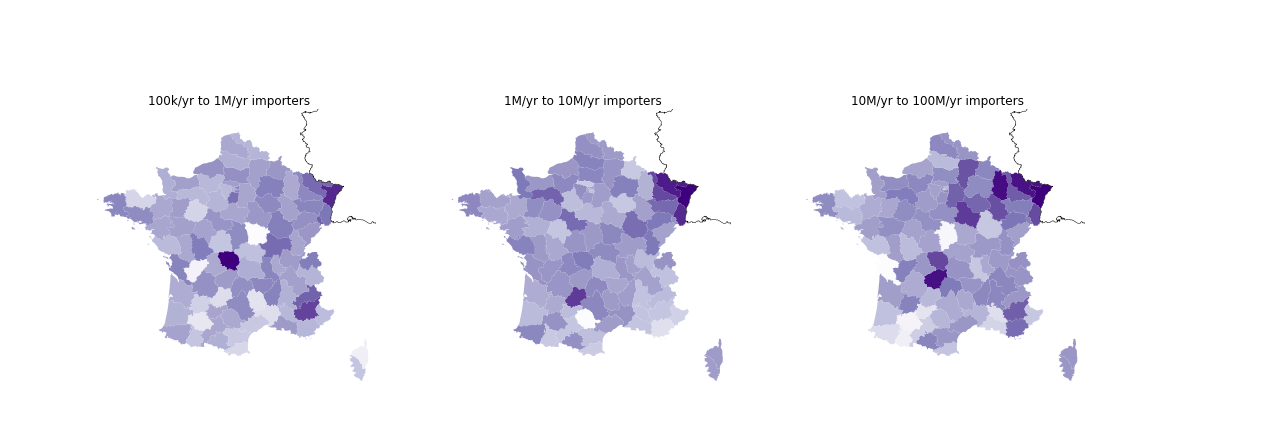

IT


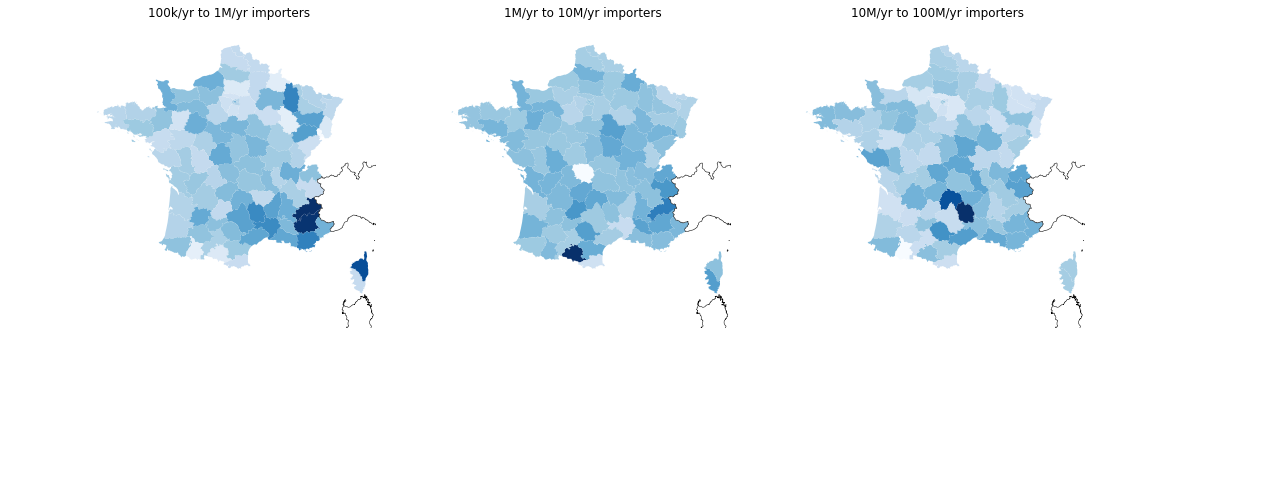

ES


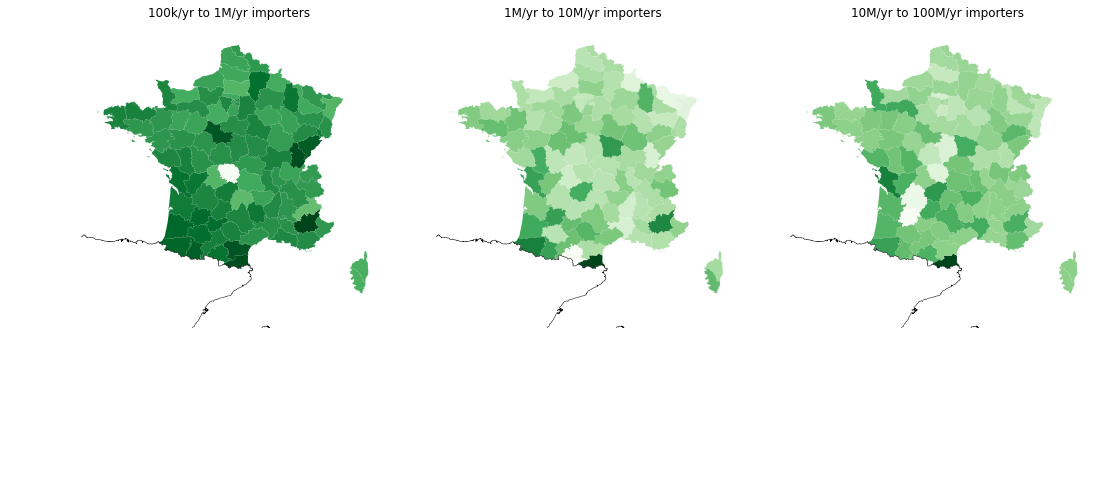

US


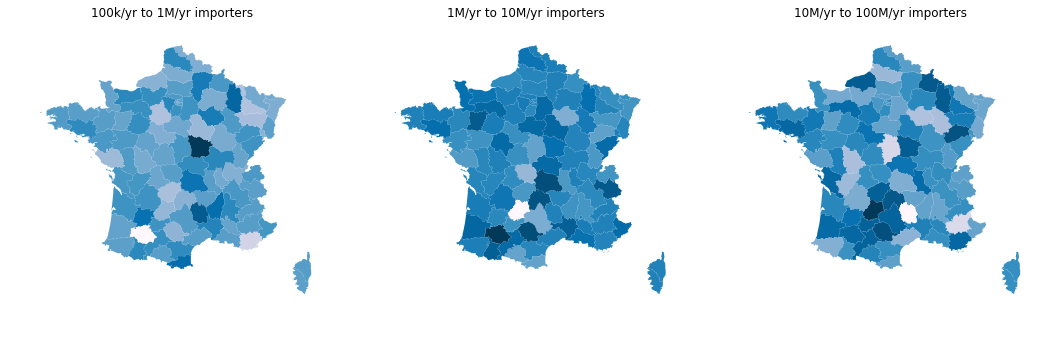

CN


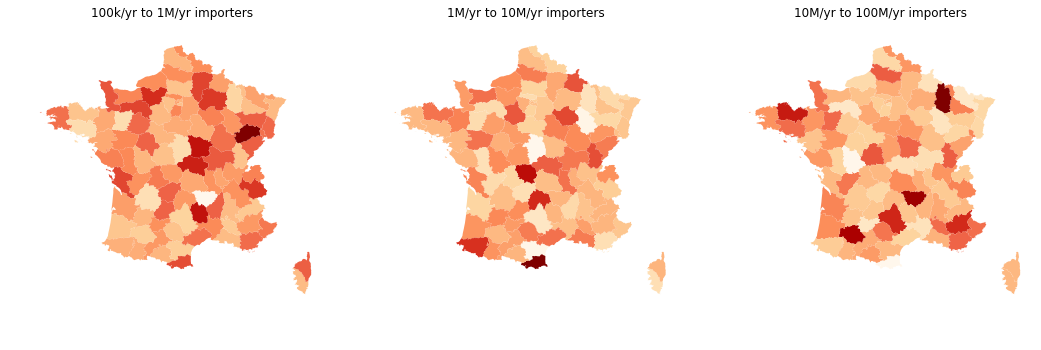

In [257]:
for j in range(6):
    country = ['BE', 'DE', 'IT', 'ES', 'US', 'CN'][j]
    print country
    
    colormap = ['Oranges', 'Purples', 'Blues', 'Greens', 'PuBu', 'OrRd'][j]
    invals = [pd.Interval(5, 6, closed='right'), pd.Interval(6, 7, closed='right'), pd.Interval(7, 8, closed='right')]
    titles = ['100k/yr to 1M/yr importers', '1M/yr to 10M/yr importers', '10M/yr to 100M/yr importers']
    fig, axs = plt.subplots(1, len(invals), figsize = (18, 5.5))
    for i in range(len(invals)):
        interval = invals[i]
        ax = axs[i]
        sel_values = values.loc[(values.PYOD == country) & (values.log_size_bin == interval) ]
        sel_values = gpd.GeoDataFrame(sel_values.merge(gdf[['code_insee', 'geometry']], left_on = 'DEPET', right_on = 'code_insee', how = 'right'))
        sel_values['mean'] = sel_values['mean'].fillna(sel_values['mean'].median())
        sel_values.plot(column = 'mean', linewidth = 0, cmap = colormap, ax = ax)
        if j< 4: 
            name = ['Belgium', 'Germany', 'Italy', 'Spain'][j]
            EU.loc[[name]].plot(linewidth = 0.5, color = 'w', ax = ax)
        ax.set_xlim(-6, 10); ax.set_ylim(40, 52);
        ax.axis('off')
        ax.set_title(titles[i])
    plt.savefig('./../Figures/firm_country_mu_coeff_'+country+'.png')
    plt.show()